In [1]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=2d3f42b4fa4d77c2147ead44b6a941018a857c1ed979d804303c50576ae54cb4
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

import umap.umap_ as umap

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
# data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/input_data/input_beach_full_data.csv")
data = pd.read_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/new_beach_data.csv")

In [6]:
data.describe()

,Water Temperature,Turbidity,Transducer Depth,Wave Height,Wave Period,Battery Life
count,1477.0,1477.0,0.0,1477.000000,1477.000000,1477.000000
mean,-100000.0,-100000.0,NaN,0.133636,4.054638,12.768382
std,0.0,0.0,NaN,0.130965,1.618947,0.774183
min,-100000.0,-100000.0,NaN,0.000000,1.200000,9.800000
25%,-100000.0,-100000.0,NaN,0.050000,2.600000,12.200000
50%,-100000.0,-100000.0,NaN,0.100000,3.900000,12.900000
75%,-100000.0,-100000.0,NaN,0.170000,5.700000,13.300000
max,-100000.0,-100000.0,NaN,0.760000,7.300000,14.800000


## Data Cleaning

In [7]:
# Count missing values in each column
print(data.isna().sum())

Beach Name                        0
Measurement Timestamp             0
Water Temperature               386
Turbidity                       386
Transducer Depth               1863
Wave Height                     386
Wave Period                     386
Battery Life                    386
Measurement Timestamp Label       0
Measurement ID                    0
dtype: int64


In [8]:
# transducer column has many null values, so dropping it
data.drop(columns='Transducer Depth',inplace=True)

In [9]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1858    False
1859    False
1860    False
1861    False
1862    False
Length: 1863, dtype: bool

In [10]:
data = data.rename(columns={'Measurement Timestamp':'Measurement_Timestamp_Org'})

data['Measurement_Timestamp_Org'] = pd.to_datetime(data['Measurement_Timestamp_Org'])

In [11]:
data.head()

,Beach Name,Measurement_Timestamp_Org,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
0,New Site,2023-05-22 15:30:00,NaN,NaN,NaN,NaN,NaN,5/22/2023 15:30,NewSite202305221530
1,New Site,2023-05-22 16:00:00,NaN,NaN,NaN,NaN,NaN,5/22/2023 16:00,NewSite202305221600
2,New Site,2023-05-22 17:00:00,NaN,NaN,NaN,NaN,NaN,5/22/2023 17:00,NewSite202305221700
3,New Site,2023-05-22 18:00:00,NaN,NaN,NaN,NaN,NaN,5/22/2023 18:00,NewSite202305221800
4,New Site,2023-05-22 19:00:00,NaN,NaN,NaN,NaN,NaN,5/22/2023 19:00,NewSite202305221900


In [12]:
data.set_index('Measurement_Timestamp_Org')

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp Label,Measurement ID
Measurement_Timestamp_Org,,,,,,,,
2023-05-22 15:30:00,New Site,NaN,NaN,NaN,NaN,NaN,5/22/2023 15:30,NewSite202305221530
2023-05-22 16:00:00,New Site,NaN,NaN,NaN,NaN,NaN,5/22/2023 16:00,NewSite202305221600
2023-05-22 17:00:00,New Site,NaN,NaN,NaN,NaN,NaN,5/22/2023 17:00,NewSite202305221700
2023-05-22 18:00:00,New Site,NaN,NaN,NaN,NaN,NaN,5/22/2023 18:00,NewSite202305221800
2023-05-22 19:00:00,New Site,NaN,NaN,NaN,NaN,NaN,5/22/2023 19:00,NewSite202305221900
...,...,...,...,...,...,...,...,...
2023-10-28 18:00:00,Ohio Street Beach,-100000.0,-100000.0,0.0,6.5,10.7,10/28/2023 18:00,OhioStreetBeach202310281800
2023-10-28 19:00:00,Ohio Street Beach,-100000.0,-100000.0,0.0,6.4,10.6,10/28/2023 19:00,OhioStreetBeach202310281900
2023-10-28 20:00:00,Ohio Street Beach,-100000.0,-100000.0,0.0,6.3,10.2,10/28/2023 20:00,OhioStreetBeach202310282000


In [13]:
# Checking whether Measurement Timestamp column is datetime / timeseries column
pd.api.types.is_datetime64_any_dtype(data['Measurement_Timestamp_Org'])

True

In [14]:
data.columns

Index(['Beach Name', 'Measurement_Timestamp_Org', 'Water Temperature',
       'Turbidity', 'Wave Height', 'Wave Period', 'Battery Life',
       'Measurement Timestamp Label', 'Measurement ID'],
      dtype='object')

Beach Name, Measurement Timestamp Label, and Measurement ID columns looks doubtful to me. rest all of the columns are useful

Useful columns: 'Measurement Timestamp', 'Water Temperature', 'Turbidity','Transducer Depth', 'Wave Height', 'Wave Period', 'Battery Life'

### Ouliers Detection

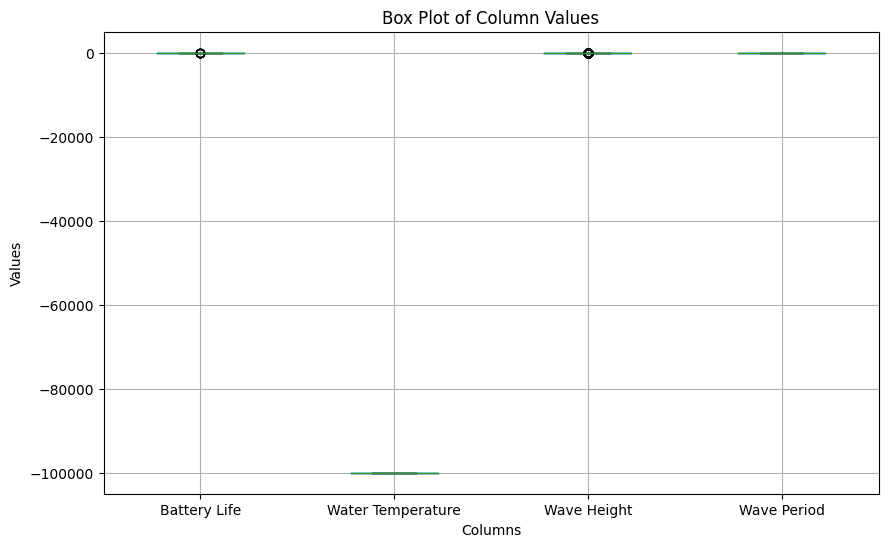

In [15]:
# Ouliers Detection

# Create box plots for each column in the DataFrame
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed

data[['Battery Life','Water Temperature','Wave Height','Wave Period']].boxplot()

# Set the title and labels
plt.title('Box Plot of Column Values')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

Few Values were in the range of -999 for Wave Height column. They does not look appropriate, so removing them.

In [16]:
# data = data.drop(data.loc[data['Wave Height']<-999,:].index)

### Dropping unwanted columns
Dropping the columns **Beach Name, Measurement Timestamp Label,Measurement ID** because they are not numericals and are not helpful in dimensionality reduction.

In [18]:
# data = data.drop(columns=['Measurement Timestamp Label','Measurement ID','Status'])
data = data.drop(columns=['Measurement Timestamp Label','Measurement ID'])

In [19]:
data_sorted = data.sort_values(by=['Beach Name','Measurement_Timestamp_Org'])

In [20]:
data_sorted

,Beach Name,Measurement_Timestamp_Org,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,New Site,2023-05-22 15:30:00,NaN,NaN,NaN,NaN,NaN
1,New Site,2023-05-22 16:00:00,NaN,NaN,NaN,NaN,NaN
2,New Site,2023-05-22 17:00:00,NaN,NaN,NaN,NaN,NaN
3,New Site,2023-05-22 18:00:00,NaN,NaN,NaN,NaN,NaN
4,New Site,2023-05-22 19:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
381,Ohio Street Beach Buoy,2023-08-08 06:00:00,NaN,NaN,NaN,NaN,NaN
382,Ohio Street Beach Buoy,2023-08-08 07:00:00,NaN,NaN,NaN,NaN,NaN
383,Ohio Street Beach Buoy,2023-08-08 08:00:00,NaN,NaN,NaN,NaN,NaN
384,Ohio Street Beach Buoy,2023-08-08 09:00:00,NaN,NaN,NaN,NaN,NaN


In [21]:
data_sorted['Beach Name'].unique()

array(['New Site', 'Ohio Street Beach', 'Ohio Street Beach Buoy'],
      dtype=object)

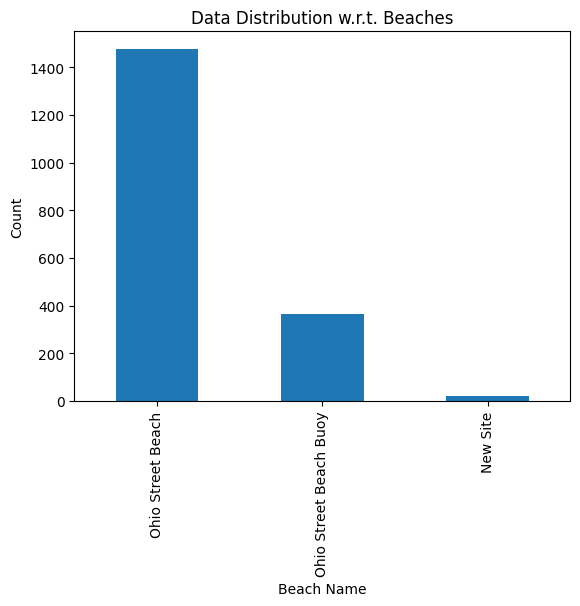

In [22]:
data_sorted['Beach Name'].value_counts().plot(kind='bar')
plt.xlabel('Beach Name')
plt.ylabel('Count')
plt.title('Data Distribution w.r.t. Beaches')
plt.show()

In [23]:
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Data1/Umap_Data_Manipulation/data_sorted.csv")

### Label Encoding
Performing label encoding to convert categorical data in Beach Name column to numeric

In [26]:
lblEn = LabelEncoder()

data_sorted['Beach Name'] =lblEn.fit_transform(data_sorted['Beach Name'])

In [27]:
lblEn.inverse_transform(np.array([0, 1, 2]))
# lblEn.inverse_transform(np.array([0, 1, 2, 3]))
# lblEn.inverse_transform(np.array([0, 1, 2, 3, 4, 5]))
# data_sorted['Beach Name'].uni que()

array([0, 1, 2])

In [28]:
num_cols = ['Water Temperature','Turbidity','Wave Height','Wave Period','Battery Life']

In [29]:
data_sorted

,Beach Name,Measurement_Timestamp_Org,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0,2023-05-22 15:30:00,NaN,NaN,NaN,NaN,NaN
1,0,2023-05-22 16:00:00,NaN,NaN,NaN,NaN,NaN
2,0,2023-05-22 17:00:00,NaN,NaN,NaN,NaN,NaN
3,0,2023-05-22 18:00:00,NaN,NaN,NaN,NaN,NaN
4,0,2023-05-22 19:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
381,2,2023-08-08 06:00:00,NaN,NaN,NaN,NaN,NaN
382,2,2023-08-08 07:00:00,NaN,NaN,NaN,NaN,NaN
383,2,2023-08-08 08:00:00,NaN,NaN,NaN,NaN,NaN
384,2,2023-08-08 09:00:00,NaN,NaN,NaN,NaN,NaN


### Standardizing the numeric columns

In [30]:
scaler = StandardScaler()
data_sorted[num_cols] = scaler.fit_transform(data_sorted[num_cols])

In [31]:
data_sorted

,Beach Name,Measurement_Timestamp_Org,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life
0,0,2023-05-22 15:30:00,NaN,NaN,NaN,NaN,NaN
1,0,2023-05-22 16:00:00,NaN,NaN,NaN,NaN,NaN
2,0,2023-05-22 17:00:00,NaN,NaN,NaN,NaN,NaN
3,0,2023-05-22 18:00:00,NaN,NaN,NaN,NaN,NaN
4,0,2023-05-22 19:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
381,2,2023-08-08 06:00:00,NaN,NaN,NaN,NaN,NaN
382,2,2023-08-08 07:00:00,NaN,NaN,NaN,NaN,NaN
383,2,2023-08-08 08:00:00,NaN,NaN,NaN,NaN,NaN
384,2,2023-08-08 09:00:00,NaN,NaN,NaN,NaN,NaN


In [32]:
data_sorted.isna().sum()

Beach Name                     0
Measurement_Timestamp_Org      0
Water Temperature            386
Turbidity                    386
Wave Height                  386
Wave Period                  386
Battery Life                 386
dtype: int64

### Converting the timestamp to numerical values

In [33]:
# data_sorted['Measurement Timestamp'] = data_sorted['Measurement Timestamp'].apply(lambda x: x.timestamp())
data_sorted['Measurement Timestamp'] = data_sorted['Measurement_Timestamp_Org'].apply(lambda x: x.timestamp())

In [34]:
measurement_timestamp_org_df = data_sorted['Measurement_Timestamp_Org']
data_sorted = data_sorted.drop('Measurement_Timestamp_Org',axis=1)

In [35]:
data_sorted.isna().sum()

Beach Name                 0
Water Temperature        386
Turbidity                386
Wave Height              386
Wave Period              386
Battery Life             386
Measurement Timestamp      0
dtype: int64

### Processing Null values
There are few null values present in Wave Height and Wave Period Column, we need to fill them or else eliminate them. I am filling them using KNNImputer

In [36]:
# Using KNNImputer to impute the missing values with the nearest 3 neighbors and creating a new dataframe to store
# updated data

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

new_array=imputer.fit_transform(data_sorted) # impute the missing values
    # convert the nd-array returned in the step above to a Dataframe

# data_sorted=pd.DataFrame(data=np.round(new_array), columns=data_sorted.columns)
data_sorted=pd.DataFrame(data=new_array, columns=data_sorted.columns)

In [37]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp
0,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684769e+09
1,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684771e+09
2,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684775e+09
3,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684778e+09
4,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684782e+09
...,...,...,...,...,...,...,...
1858,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691474e+09
1859,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691478e+09
1860,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691482e+09
1861,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691485e+09


##UMAP

In [38]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp
0,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684769e+09
1,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684771e+09
2,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684775e+09
3,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684778e+09
4,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684782e+09
...,...,...,...,...,...,...,...
1858,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691474e+09
1859,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691478e+09
1860,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691482e+09
1861,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691485e+09


In [39]:
# Apply UMAP to the entire DataFrame

SEED = 43
reducer = umap.UMAP(random_state=SEED,
                    n_neighbors = 5,
                    n_components = 2,
                    min_dist = 0.7)
# reducer = umap.UMAP(random_state=SEED)

umap_result = reducer.fit_transform(data_sorted)

umap_result

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


array([[-5.421918 ,  3.2192428],
       [-5.5267572,  3.117699 ],
       [-5.412301 ,  3.2117424],
       ...,
       [17.789986 , 13.749483 ],
       [18.03992  , 13.581182 ],
       [18.2628   , 13.594436 ]], dtype=float32)

### Visualizing the UMAP output

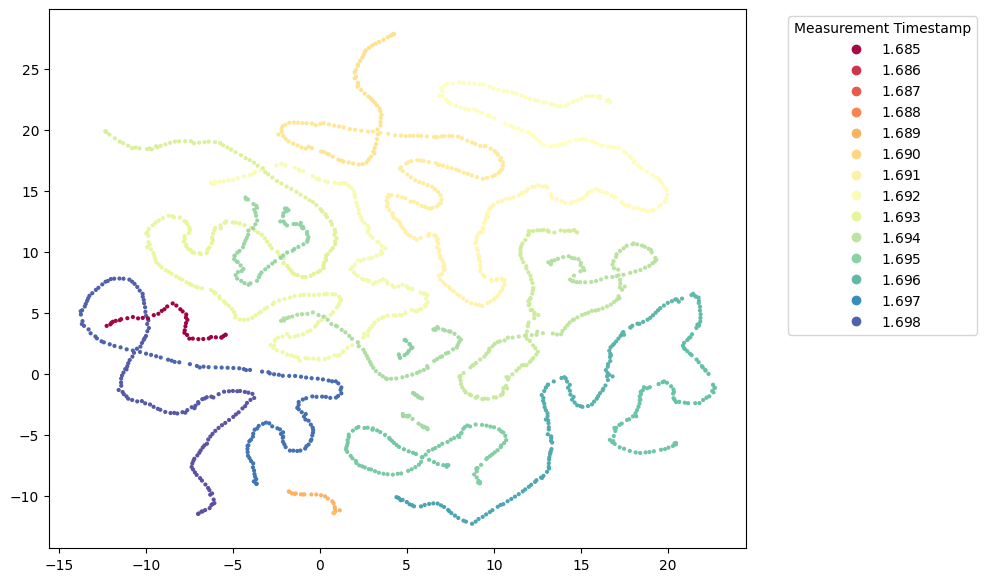

In [40]:
fig, ax = plt.subplots(figsize=(9, 7))

scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted['Measurement Timestamp'], s=4, cmap='Spectral');

# Add a legend
plt.legend(*scatter.legend_elements(), title='Measurement Timestamp',bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

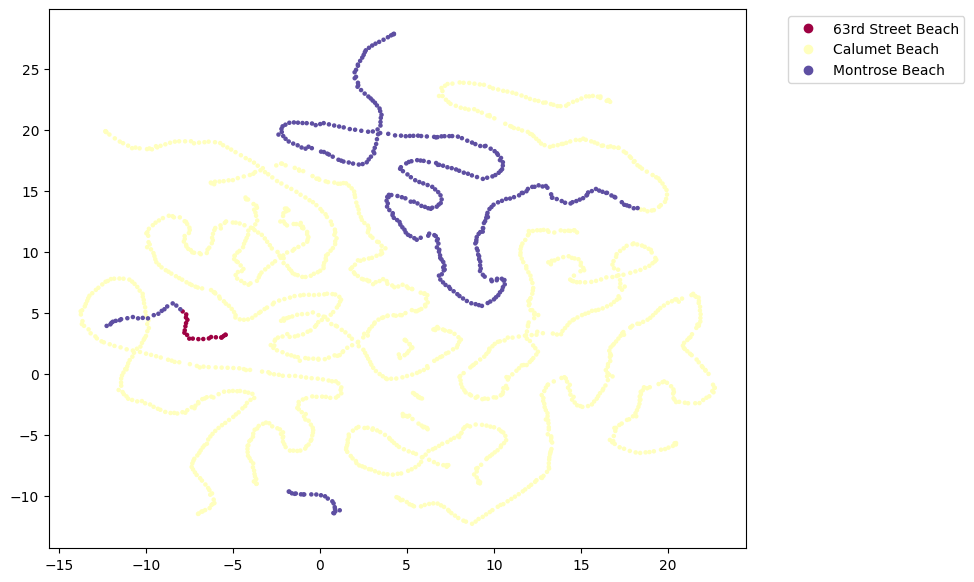

In [41]:
fig, ax = plt.subplots(figsize=(9, 7))


scatter = plt.scatter(umap_result[:, 0], umap_result[:, 1], c=data_sorted['Beach Name'] , s=5, cmap='Spectral')

# Create a legend using the unique beach names
legend_labels = ['63rd Street Beach', 'Calumet Beach', 'Montrose Beach', 'Ohio Street Beach', 'Osterman Beach', 'Rainbow Beach']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels,bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [42]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp
0,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684769e+09
1,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684771e+09
2,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684775e+09
3,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684778e+09
4,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684782e+09
...,...,...,...,...,...,...,...
1858,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691474e+09
1859,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691478e+09
1860,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691482e+09
1861,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691485e+09


### Exporting the UMAP output to excel

In [43]:
# Creating the dataframe from the array umap_result
# umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1','UMAP-2'])


umap_result_df = pd.DataFrame(umap_result,columns=['UMAP-0','UMAP-1'])

In [44]:
umap_result_df

,UMAP-0,UMAP-1
0,-5.421918,3.219243
1,-5.526757,3.117699
2,-5.412301,3.211742
3,-5.631035,2.998102
4,-5.662086,2.996572
...,...,...
1858,17.496906,13.867528
1859,17.648035,13.815048
1860,17.789986,13.749483
1861,18.039921,13.581182


In [45]:
# Saving the two pandas dataframes data_sorted_label_enc and umap_result_df into data_sorted_label_enc_out using concat function of pandas

data_sorted = pd.concat([data_sorted,measurement_timestamp_org_df,umap_result_df], axis=1)

In [46]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp,Measurement_Timestamp_Org,UMAP-0,UMAP-1
0,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684769e+09,2023-05-22 15:30:00,-5.421918,3.219243
1,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684771e+09,2023-05-22 16:00:00,-5.526757,3.117699
2,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684775e+09,2023-05-22 17:00:00,-5.412301,3.211742
3,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684778e+09,2023-05-22 18:00:00,-5.631035,2.998102
4,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684782e+09,2023-05-22 19:00:00,-5.662086,2.996572
...,...,...,...,...,...,...,...,...,...,...
1858,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691474e+09,2023-10-28 18:00:00,17.496906,13.867528
1859,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691478e+09,2023-10-28 19:00:00,17.648035,13.815048
1860,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691482e+09,2023-10-28 20:00:00,17.789986,13.749483
1861,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691485e+09,2023-10-28 21:00:00,18.039921,13.581182


In [47]:
# Exporting the csv file
data_sorted.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/1/new_beach_data_cleaned.csv")

In [48]:
data_sorted

,Beach Name,Water Temperature,Turbidity,Wave Height,Wave Period,Battery Life,Measurement Timestamp,Measurement_Timestamp_Org,UMAP-0,UMAP-1
0,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684769e+09,2023-05-22 15:30:00,-5.421918,3.219243
1,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684771e+09,2023-05-22 16:00:00,-5.526757,3.117699
2,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684775e+09,2023-05-22 17:00:00,-5.412301,3.211742
3,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684778e+09,2023-05-22 18:00:00,-5.631035,2.998102
4,0.0,0.0,0.0,-0.129613,0.089819,0.514633,1.684782e+09,2023-05-22 19:00:00,-5.662086,2.996572
...,...,...,...,...,...,...,...,...,...,...
1858,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691474e+09,2023-10-28 18:00:00,17.496906,13.867528
1859,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691478e+09,2023-10-28 19:00:00,17.648035,13.815048
1860,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691482e+09,2023-10-28 20:00:00,17.789986,13.749483
1861,2.0,0.0,0.0,-0.129613,0.089819,0.514633,1.691485e+09,2023-10-28 21:00:00,18.039921,13.581182


## Inverse_transform function to approximate the original data points


In [49]:
approximated_data = reducer.inverse_transform(umap_result)

In [50]:
inverted_data = pd.DataFrame(data=approximated_data)
inverted_data

,0,1,2,3,4,5,6
0,-7.176024e-11,0.0,0.0,-0.129613,0.089819,0.514633,1.684778e+09
1,-1.815651e-13,0.0,0.0,-0.129590,0.089819,0.514633,1.684778e+09
2,-1.453225e-13,0.0,0.0,-0.129613,0.089819,0.514633,1.684778e+09
3,-3.273841e-12,0.0,0.0,-0.129613,0.089819,0.514633,1.684778e+09
4,5.111170e-02,0.0,0.0,-0.116600,0.105609,0.523438,1.685182e+09
...,...,...,...,...,...,...,...
1858,2.000000e+00,0.0,0.0,-0.129613,0.089819,0.514633,1.691477e+09
1859,8.167316e-01,0.0,0.0,-1.195884,0.089819,1.579936,1.691481e+09
1860,6.797814e-02,0.0,0.0,-1.936310,0.089819,2.320293,1.691481e+09
1861,-1.808912e+00,0.0,0.0,-2.806360,-3.312027,3.127714,1.691492e+09


In [51]:
inverted_data.to_csv("/content/drive/MyDrive/UALR/GA/GA/Repository/paraview/umap/1/inverted_csv.csv")